In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn . ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('WMT1.csv')
data_17 = data[data.Year == 2017]

# calculate the mean std
mean_17 = data_17.groupby('Week_Number')['Return'].mean().tolist()
std_17 = data_17.groupby('Week_Number')['Return'].std().tolist()
week_id_17 = list(data_17.groupby('Week_Number').indices.keys())
color_17 = data_17.groupby('Week_Number')['label'].agg(lambda x: x.mode()).tolist()

data_18 = data[data.Year == 2018]
data_18.drop(data_18.index[-1], inplace=True)

# calculate the mean std
mean_18 = data_18.groupby('Week_Number')['Return'].mean().tolist()
std_18 = data_18.groupby('Week_Number')['Return'].std().tolist()
weekly_18 = data[(data.Year == 2018) & (data.Weekday == 'Friday')]['Adj Close'].values  # select Friday's data

week_id_18 = list(data_18.groupby('Week_Number').indices.keys())
color_18 = data_18.groupby('Week_Number')['label'].agg(lambda x: x.mode()).tolist()


/Users/wangxiaoyang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [3]:
df_17 = pd.DataFrame(
    {
        'id':week_id_17,
        'mean':mean_17,
        'std':std_17,
        'label':color_17
    },
    columns = ['id','mean','std','label']
)

df_18 = pd.DataFrame(
    {
        'id':week_id_18,
        'mean':mean_18,
        'std':std_18,
        'label':color_18
    },
    columns = ['id','mean','std','label']
)

In [4]:
x_train = df_17[['mean','std']].values
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
y_train= df_17['label'].values

x_test = df_18[['mean','std']].values
scaler = StandardScaler()
scaler.fit(x_test)
x_test = scaler.transform(x_test)
y_test = df_18['label'].values

In [54]:
#question1
x_label = []
err_rate_list = []
for n in range(10):
    for d in range(5):
        model = RandomForestClassifier ( n_estimators =n+1, max_depth =d+1,criterion ='entropy')
        model = model.fit(x_train,y_train)
        prediction = model.predict(x_test)
        err_rate = np.mean(prediction != y_test)
        x_label.append(str(n+1)+','+str(d+1))
        err_rate_list.append(err_rate)

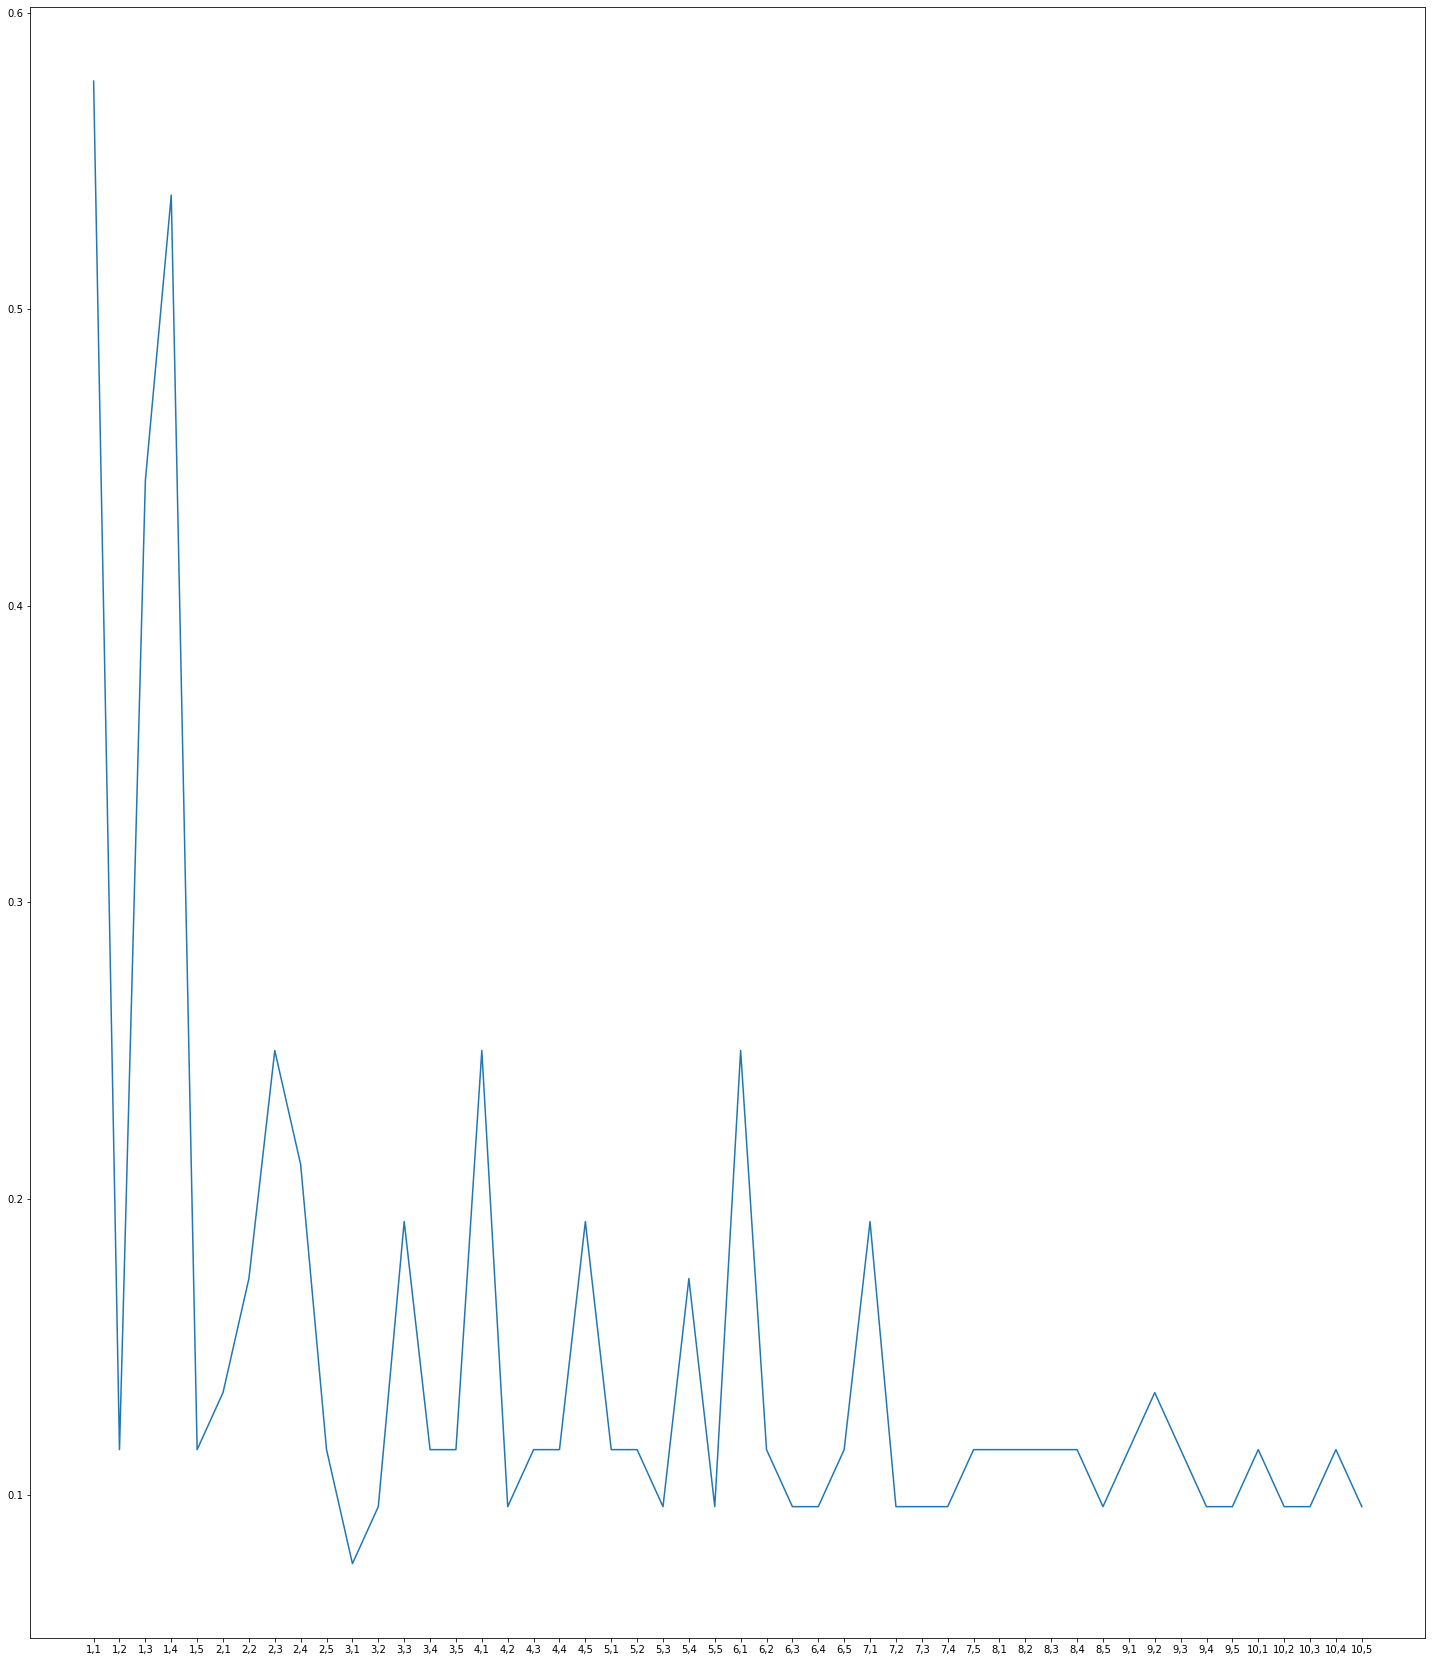

In [55]:
plt.figure(figsize=(25, 30))

plt.plot(x_label, err_rate_list)
plt.show()

In [57]:
print('so the best combinations are N=3,d=1')

so the best combinations are N=3,d=1


In [61]:
#question2
#N = 3,d = 5

model = RandomForestClassifier ( n_estimators =3, max_depth =1,criterion ='entropy')
model = model.fit(x_train,y_train)
prediction = model.predict(x_test)
err_rate = np.mean(prediction != y_test)
a = confusion_matrix(y_test,prediction)
a

array([[26,  5],
       [ 5, 16]])

In [62]:
#question3
TPR = a[0][0]/(a[0][0]+a[0][1])
TNR = a[1][1]/(a[1][0]+a[1][1])
print('true positive rate is :',TPR)
print('true negative rate is :',TNR)

true positive rate is : 0.8387096774193549
true negative rate is : 0.7619047619047619


In [63]:
#question4
previous_shares = 0
previous_balance = 100
weekly_balance = []
for i in range(len(weekly_18)-1):
    if prediction[i+1] == 'green':
        if previous_shares ==0 :
            previous_shares = previous_balance/weekly_18[i]
    elif prediction[i+1] == 'red':
        if previous_shares != 0:
            previous_balance = previous_shares*weekly_18[i]
            previous_shares = 0

    weekly_balance.append(previous_balance)
result1 = weekly_balance[-1]

In [65]:
result2 = 100/weekly_18[0]*weekly_18[-1]

print('result based on my labels: %f $'%result1)
print('result based on buy and hold: %f $'%result2)
print('my labels results in a large amount at the end of the year')

result based on my labels: 132.293195 $
result based on buy and hold: 94.188504 $
my labels results in a large amount at the end of the year
